In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

motor_ab = pd.read_csv('abnormal.csv')
motor_nor = pd.read_csv('normal.csv')

motor_main = pd.concat([motor_ab, motor_nor], ignore_index=True)

motor_main.head(10)


,class,motor_id,peak,trough,mean,RMS,Crest_Factor
0,1,1,0.50853,-0.71970,0.228711,0.284442,1.787816
1,1,1,0.50853,-0.68132,0.227290,0.282652,1.799139
2,1,1,0.54691,-0.68132,0.224891,0.278162,1.966157
3,1,1,0.50853,-0.68132,0.231562,0.287161,1.770891
4,1,1,0.54571,-0.68252,0.224760,0.278164,1.961827
5,1,1,0.50733,-0.68252,0.231384,0.287160,1.766714
6,1,1,0.50733,-0.68252,0.225771,0.279506,1.815094
7,1,1,0.50733,-0.64414,0.224422,0.277728,1.826716
8,1,1,0.50838,-0.68147,0.225918,0.279508,1.818840
9,1,1,0.50838,-0.64309,0.224569,0.277736,1.830446


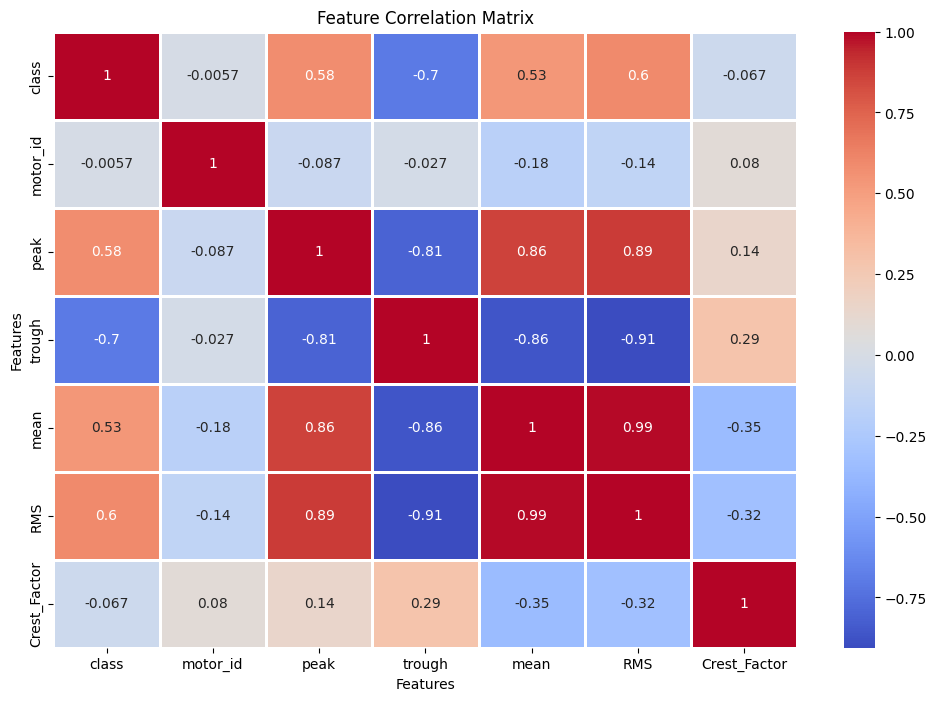

In [4]:
# 상관 관계 계산
correlation_matrix = motor_main.corr()

# 히트맵으로 상관 관계 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=2)

# 그래프 타이틀 및 라벨 설정
plt.title('Feature Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# 그래프 보여주기
plt.show()

0.8513647642679901
0.8488833746898263
0.8531172069825437
0.850995024875622
[[3441  589]
 [ 609 3421]]


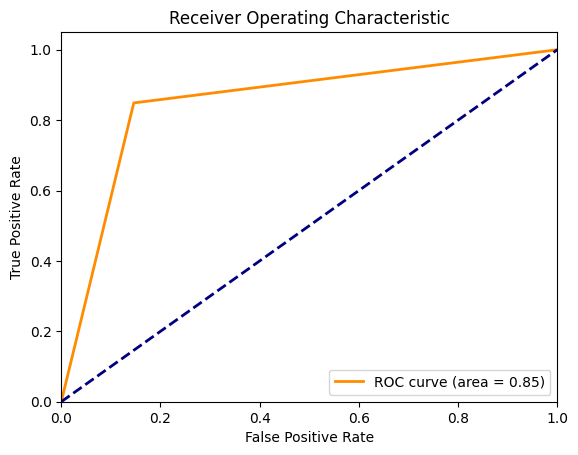

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, roc_curve, auc

#model Create
model = LogisticRegression()


X = motor_main.drop(['class','motor_id','Crest_Factor'],axis=1)
y = motor_main['class']

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=13)


model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#Logistic Regression model verification
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(accuracy)
print(recall)
print(precision)
print(f1)
print(conf_matrix)

# 테스트 데이터에 대한 예측 확률 계산
y_pred = model.predict(x_test)


# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
